In [1]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=\
keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Input(shape=(28,28)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

if 구문의 역할은
model_fn() 함수에 (ajayer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것입니다. 여기서는 a_layer 매개변수로 층을 추가하지 않고 단순하게 model_fn() 함수를 호출합니다. 그리고 모델 구조를 출력하면 이전 절과 동일한 모델이라는 것을 확인할 수 있습니다.

In [3]:
model=model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)

verbose 매개변수는 훈련 과정 출력을 조절합니다. 기본값은 1로 이전 절에서처럼 에포크마다 진행 막대와 함께 손실등의 지표가 출력됩니다. 2로 바꾸면 진행 막대를 빼고 출력됩니다. 이번 절에서는 훈련 결과를 그래프로 나타내는 대신 verbose 매개변수를 0으로 지정하여 훈련 과정을 나타내지 않겠습니다.


In [5]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


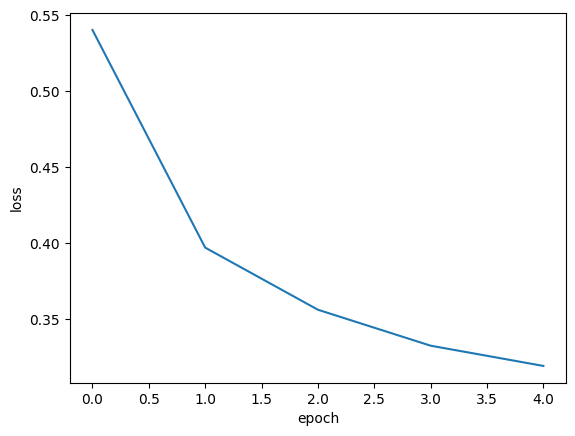

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

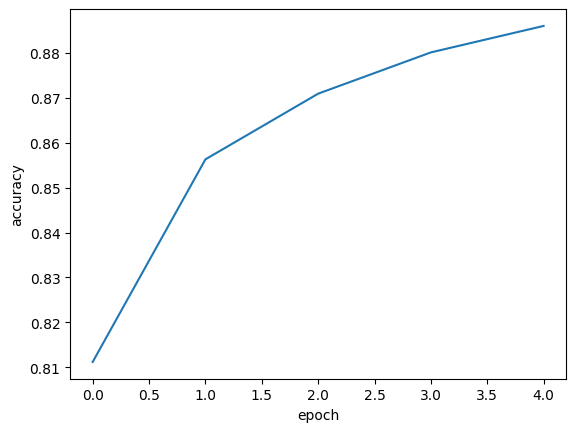

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

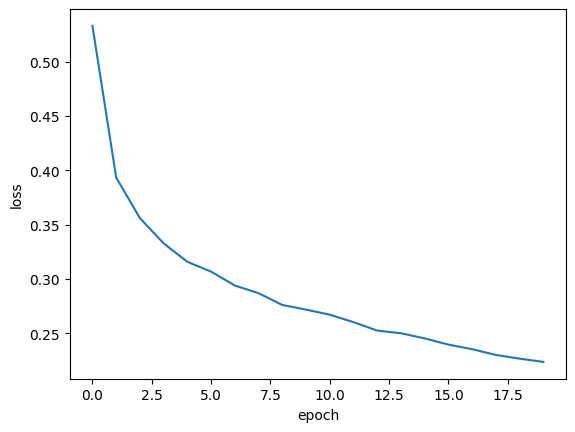

In [9]:
from keras.src.utils.image_utils import PIL_INTERPOLATION_METHODS
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target,epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target))

In [13]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


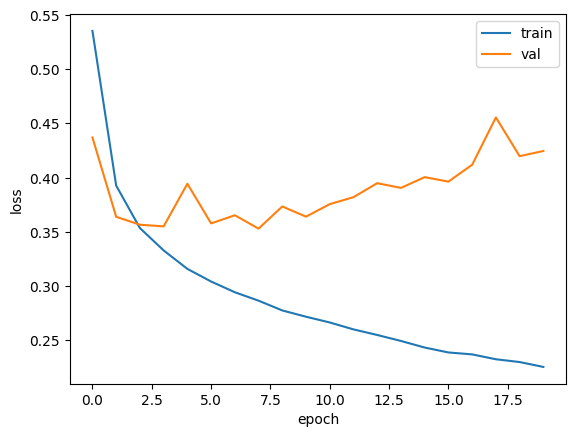

In [14]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

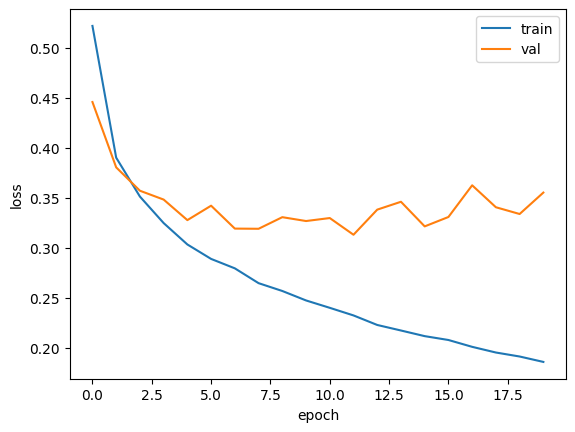

In [17]:
model=model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'],label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

드롭아웃dropout
훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 （즉 뉴런의 출력을 0으로 만들어）
과대적합을 막습니다.
뉴런은 랜덤하게 드롭아웃
되고 얼마나 많은 뉴런을 드롭할지는 우리가 정해야 할 또 다른 하이퍼파라미터입니다.
2개의 신경망을 앙상블 하는 것
처럼 상상할 수 있습니다. 5장에서 보았듯이 앙상블은 과대적합을 막
아 주는 아주 좋은 기법입니다.

In [18]:
model=model_fn(keras.layers.Dropout(0.3)) #30% dropout한다~
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

은닉층 뒤에 추가된 드롭아웃 층(Dropout)은 훈련되는 모델 파라미
터가 없습니다. 또한 입력과 출력의 크기가 같습니다. 일부 뉴런의 출력을 0으로 만들지만 전체 출력
배열의 크기를 바꾸지는 않습니다.
-> 이게 뭘 의미하는거지?

드롭아웃 층은 “뉴런 몇 개를 잠깐 숨기는 장치인데, 개수나 모양은 그대로” 라는 뜻이라고 보면 된다.

“훈련되는 모델 파라미터가 없다”는 말
일반적인 층(예: Dense)은 가중치, 편향 같은 “공부하면서 값이 바뀌는 숫자들(파라미터)”을 가지고 있다.

그런데 드롭아웃 층은 그런 가중치나 편향을 가지지 않고, 그저 “이번에는 어떤 뉴런을 끌지”를 랜덤으로 뽑아서 0으로 만들어 줄 뿐이다.

→ 그래서 드롭아웃 층 자체는 공부할 새로운 숫자가 없다고 해서 “훈련되는 모델 파라미터가 없다”고 표현하는 것이다.

“입력과 출력의 크기가 같다”는 말
드롭아웃 층에 10개의 숫자가 들어왔다고 해 보자.

드롭아웃은 이 10개 중에서 몇 개를 골라 0으로 만들지만, 여전히 결과는 “숫자 10개”짜리다.

→ 즉, 들어오는 칸 수와 나가는 칸 수가 같다는 의미에서 “입력과 출력의 크기가 같다”고 말하는 것이다.

“일부 뉴런의 출력을 0으로 만들지만 크기는 안 바뀐다”
예를 들어, 입력이 [3, 5, 1, 7, 2] 라고 하면, 드롭아웃이 이렇게 만들 수 있다:

[3, 0, 1, 0, 2]

중간중간 값을 0으로 “꺼버리긴” 했지만, 원래처럼 여전히 5칸짜리 배열이다.

→ 초등학생 식으로 말하면:

학생 5명이 줄 서 있는데, 선생님이 그중 2명에게 “이번엔 조용히 있어(0점)”라고 해서 말을 못 하게 하는 것과 비슷하다.

줄에 서 있는 사람 수(5명)는 그대로인데, 말하는 사람(0이 아닌 값)만 줄어드는 것이다.




케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용
하지 않습니다.

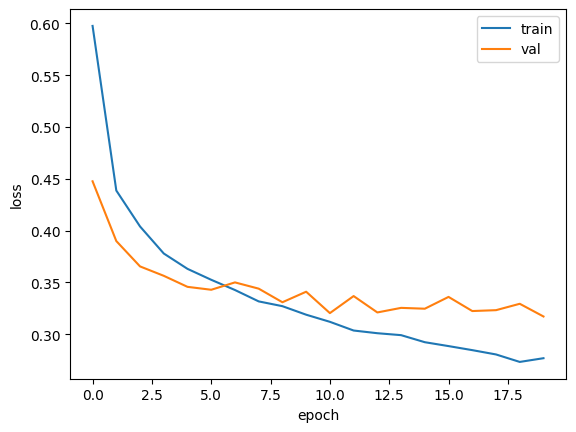

In [21]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_scaled, train_target, epochs=11, verbose=0,
                  validation_data=(val_scaled, val_target))

In [23]:
model.save('model-whole.keras')
model.save_weights('model.weights.h5')
#save : 모델 구조와 파라미터 저장, 확장자는 keras
#save.weights:훈련된 모델의 파라미터만 저장, HDF5 포맷으로 저장

In [24]:
!ls -al model*

-rw-r--r-- 1 root root 976600 Nov 20 14:23 model.weights.h5
-rw-r--r-- 1 root root 979409 Nov 20 14:23 model-whole.keras


In [26]:
#훈련하지 않은 새로운 모델을 만들고 model.weights 훈련된 파라미터 읽어서 사용
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [28]:
import numpy as np
val_labels=np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels==val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.8765833333333334


predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이 argmax () 함수를 사용했습니다. 이 함수는 배열에서 가장 큰 값의 인덱스!!!!를 반환합니다. 예를 들어 배열의 첫 번째 원소가 가장
큰 값일 경우 0을 반환합니다. 다행히 우리가 준비한 타깃값도 0부터 시작하기 때문에 비교하기 좋
습니다.
argmax () 함수의 axis_1은 배열의 마지막 차원을 따라 최댓값을 고릅니다. 검증 세트는 2차원
배열이기 때문에 마지막차원은 1 이 됩니다.axis=0이면 열을 따라 각 행의 최댓값의 인덱스를 선택하고, axis=1이면 행을 따라 각 열의 최댓값
의 인덱스를 선택합니다.


In [29]:
model=keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8807 - loss: 0.3304


[0.3369418680667877, 0.8765833377838135]

load_model() 함수는 모델 파라미터뿐만 아니라 모델 구조와 옵티마이저 상태까지 모두 복원하기 때문에 evaluate() 메서드를 사용할 수 있습니다.

콜백callback은 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용합니다.
여기서 사용할 Modelcheckpoint 콜백은 기본적으로 에포크마다 모델을 저장합니다. save_
best_only=True 매개변수를 지정하여 가장 낮은 검증 손실을 만드는 모델을 저장할 수 있습니다.
저장될 파일 이름을 best-model.keras’로 지정하여 콜백을 적용해 보겠습니다.

In [32]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.keras',
                                              save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Modelcheckpoint 클래스의 객체 checkpoint_cb를 만든 후 fit() 메서드의 callbacks 매개변
수에 리스트로 감싸서 전달합니다. 모델이 훈련한 후에 best-model.h5에 최상의 검증 점수를 낸
모델이 저장됩니다. 이 모델을 load_model() 함수로 다시 읽어서 예측을 수행해 보죠.

In [33]:
model=keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8867 - loss: 0.3163


[0.318054735660553, 0.8866666555404663]

Modelcheckpoint 콜백이 가장 낮은 검증 손실 모델을 자동으로 저장해 주었습니
다. 하지만 여전히 20번의 에포크 동안 훈련을 하는군요. 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없습니다. 이때 훈련을 중지하면 컴퓨터자원과 시간을 아낄 수 있습니다. 이렇게 과대적합이 시작되기 전에 훈련을 미리 중지하는 것을 조기종료early stopping라고 부르며, 딥 러닝 분야에서 널리 사용합니다.조기 종료는 훈련 에포크 횟수를 제한하는 역할이지만 모델이 과대적합되는 것을 막아 주기 때문에 규제 방법 중 하나로 생각할
수도 있습니다.
EarlyStopping 콜백을 Modelcheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을
파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있습니다. 또한 훈련을 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌립니다.

In [34]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.keras',
                                              save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,
                                                restore_best_weights=True)
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target),
                  callbacks=[checkpoint_cb, early_stopping_cb])

In [35]:
print(early_stopping_cb.stopped_epoch)

10


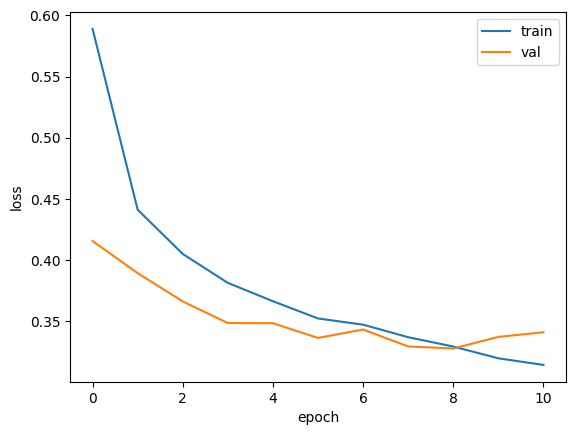

In [36]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8811 - loss: 0.3258


[0.32786908745765686, 0.8790000081062317]